<a href="https://colab.research.google.com/github/Abhishek3102/ML/blob/main/Tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Try reading the CSV file with a different encoding
df_avatar = pd.read_csv('/content/avatar.csv', encoding='ISO-8859-1')
nltk.download('vader_lexicon')


# Continue with your code
# sid = SentimentIntensityAnalyzer()
# df_character_sentiment.reset_index(inplace=True, drop=True)
# df_character_sentiment[['neg', 'neu', 'pos', 'compound']] = df_character_sentiment['character_words'].apply(sid.polarity_scores).apply(pd.Series)

# print(df_character_sentiment)


df_avatar_lines = df_avatar.groupby('character').count()
df_avatar_lines = df_avatar_lines.sort_values(by=['character_words'], ascending=False)[:10]
top_character_names = df_avatar_lines.index.values

df_character_sentiment = df_avatar[df_avatar['character'].isin(top_character_names)]
df_character_sentiment = df_character_sentiment[['character', 'character_words']]

sid = SentimentIntensityAnalyzer()
df_character_sentiment.reset_index(inplace=True, drop=True)
df_character_sentiment[['neg', 'neu', 'pos', 'compound']] = df_character_sentiment['character_words'].apply(sid.polarity_scores).apply(pd.Series)

print(df_character_sentiment.head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


  character                                    character_words    neg    neu  \
0    Katara  Water. Earth. Fire. Air. My grandmother used t...  0.196  0.735   
1     Sokka  It's not getting away from me this time.  Watc...  0.000  1.000   
2    Katara                                       Sokka, look!  0.000  1.000   
3     Sokka  Sshh! Katara, you're going to scare it away.  ...  0.200  0.800   
4    Katara                          But, Sokka! I caught one!  0.000  1.000   

     pos  compound  
0  0.069   -0.9718  
1  0.000    0.0000  
2  0.000    0.0000  
3  0.000   -0.5411  
4  0.000    0.0000  


In [ ]:
df_avatar.drop(columns="Unnamed: 0", axis=1, inplace=True)

In [ ]:
df_avatar.head()

,id,book,book_num,chapter,chapter_num,character,full_text,character_words,writer,director,imdb_rating
0,1,Water,1,The Boy in the Iceberg,1,Katara,Water. Earth. Fire. Air. My grandmother used t...,Water. Earth. Fire. Air. My grandmother used t...,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
1,2,Water,1,The Boy in the Iceberg,1,Scene Description,"As the title card fades, the scene opens onto ...",NaN,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
2,3,Water,1,The Boy in the Iceberg,1,Sokka,It's not getting away from me this time. [Clos...,It's not getting away from me this time. Watc...,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
3,4,Water,1,The Boy in the Iceberg,1,Scene Description,"The shot pans quickly from the boy to Katara, ...",NaN,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
4,5,Water,1,The Boy in the Iceberg,1,Katara,"[Happily surprised.] Sokka, look!","Sokka, look!","<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1


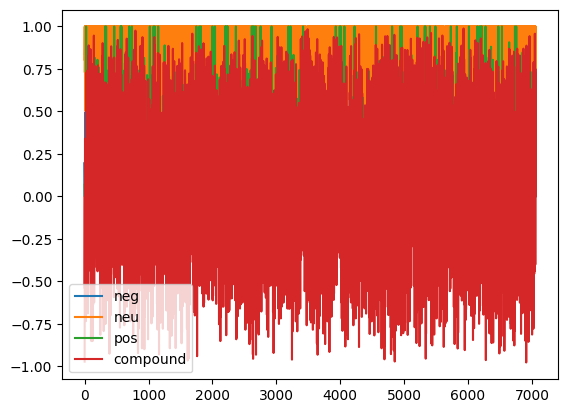

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_character_sentiment[['neg', 'neu', 'pos', 'compound']])
plt.legend(['neg', 'neu', 'pos', 'compound'])
plt.show()

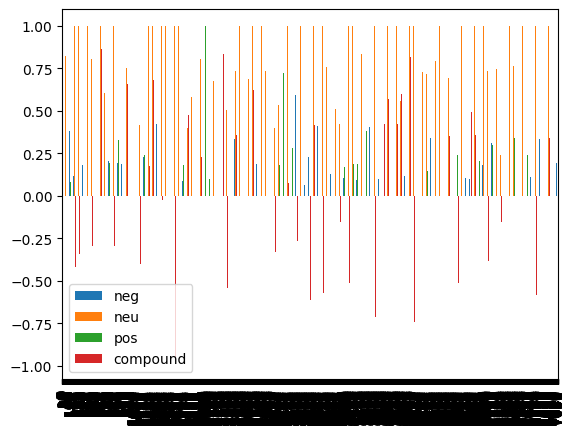

In [ ]:
df_character_sentiment[['neg', 'neu', 'pos', 'compound']].plot(kind='bar')
plt.show()

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Football Summer break started tonight but a big tree like obstruction is euros and copa america competition which will happen in Canada next winter.")

print([(X.text, X.label_) for X in doc.ents])

[('Summer', 'DATE'), ('tonight', 'TIME'), ('Canada', 'GPE'), ('next winter', 'DATE')]


In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

# PorterStemmer
porter = PorterStemmer()
# LancasterStemmer
lancaster = LancasterStemmer()

print(porter.stem("satisfaction"))
print(lancaster.stem("satisfaction"))

satisfact
satisfact


In [ ]:
from nltk import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()
words = ['lovingly', 'prettier', 'honing', 'atrocious']

# Mapping POS tags
pos_tags = ['r', 'a', 'v', 'a']
for word, pos in zip(words, pos_tags):
    print(lemmatizer.lemmatize(word, pos=pos))

lovingly
pretty
hone
atrocious


In [ ]:
from nltk.corpus import wordnet

def get_noun_from_verb(verb):
    # Get synsets for the verb
    synsets = wordnet.synsets(verb, pos=wordnet.VERB)

    # Iterate over the synsets to find the corresponding noun forms
    for synset in synsets:
        for lemma in synset.lemmas():
            # Look for the derivationally related forms (which include nouns)
            for related_form in lemma.derivationally_related_forms():
                if related_form.synset().pos() == 'n':
                    return related_form.name()  # Return the first noun found
    return None  # Return None if no noun is found

words = ['honing', 'running', 'eating']

for word in words:
    noun_form = get_noun_from_verb(word)
    print(f'Verb: {word}, Noun: {noun_form}')


Verb: honing, Noun: hone
Verb: running, Noun: run
Verb: eating, Noun: eater


In [ ]:
from nltk.corpus import wordnet

def convert_word(word, target_pos):
    # Define a mapping of target POS tags
    pos_map = {
        'noun': wordnet.NOUN,
        'verb': wordnet.VERB,
        'adjective': wordnet.ADJ,
        'adverb': wordnet.ADV
    }

    # Get the current POS of the word by finding its synsets
    synsets = wordnet.synsets(word)
    if not synsets:
        return f"No synsets found for {word}."

    # Iterate over synsets to find the desired POS form
    for synset in synsets:
        for lemma in synset.lemmas():
            # Check if the lemma can be converted to the desired POS
            for related_form in lemma.derivationally_related_forms():
                if related_form.synset().pos() == pos_map[target_pos]:
                    return related_form.name()

    return f"No {target_pos} form found for {word}."

# Example usage
word = input("Enter a word: ").strip()
target_pos = input("Enter the target part of speech (noun, verb, adjective, adverb): ").strip().lower()

converted_word = convert_word(word, target_pos)
print(f"Converted word: {converted_word}")

Enter a word: convince
Enter the target part of speech (noun, verb, adjective, adverb): adverb
Converted word: No adverb form found for convince.


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 82.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

def convert_word(word, target_pos):
    # Process the input word with SpaCy
    doc = nlp(word)

    if not doc:
        return f"No analysis found for {word}."

    # Map SpaCy POS tags to user-friendly names
    pos_map = {
        'NOUN': 'noun',
        'VERB': 'verb',
        'ADJ': 'adjective',
        'ADV': 'adverb'
    }

    # Extract the POS and lemma
    for token in doc:
        current_pos = pos_map.get(token.pos_, None)
        if current_pos == target_pos:
            return token.lemma_

    return f"No {target_pos} form found for {word}."

# Example usage
word = input("Enter a word: ").strip()
target_pos = input("Enter the target part of speech (noun, verb, adjective, adverb): ").strip().lower()

# Convert the target POS to SpaCy format
pos_conversion = {
    'noun': 'NOUN',
    'verb': 'VERB',
    'adjective': 'ADJ',
    'adverb': 'ADV'
}

converted_word = convert_word(word, pos_conversion.get(target_pos, ''))
print(f"Converted word: {converted_word}")


Enter a word: convincingly
Enter the target part of speech (noun, verb, adjective, adverb): noun
Converted word: No NOUN form found for convincingly.
